#### Feature Description

1) Channel - Horeca (Hotel/Restaurant/Cafe or Retail channel (Nominal) <br>
2) Regions - Lisnon, Oporto or Other (Nominal)                  
3) Fresh - annual spending  on fresh products (Continuous)<br>
4) Milk - annual spending  on milk products (Continuous)<br>
5) Grocery - annual spending on grocery products (Continuous)<br>
6) Frozen - annual spending on frozen products (Continuous) <br>
7) Detergents - annual spending  on detergents and paper products (Continuous) <br>
8) Delicatessen - annual spending on and delicatessen products (Continuous)<br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
df=pd.read_csv("/Wholesale_data.csv")

In [16]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [17]:
df.shape

(440, 8)

In [18]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [19]:
df.isna().sum()  # used to check null values

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [20]:
df.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [21]:
df["Channel"].value_counts()

1    298
2    142
Name: Channel, dtype: int64

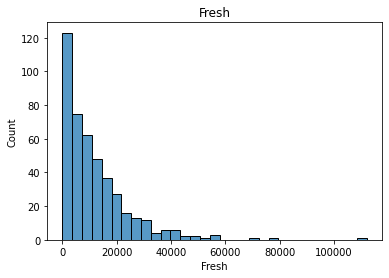

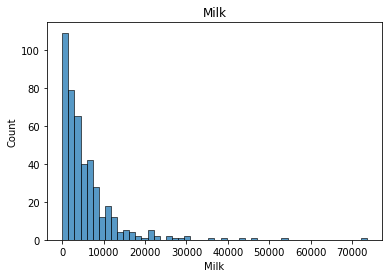

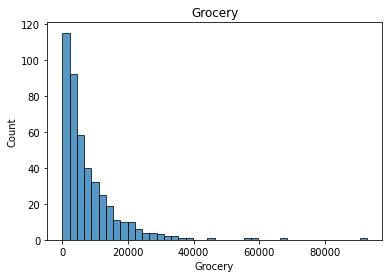

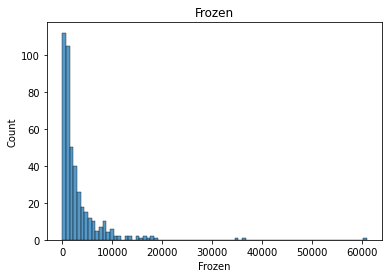

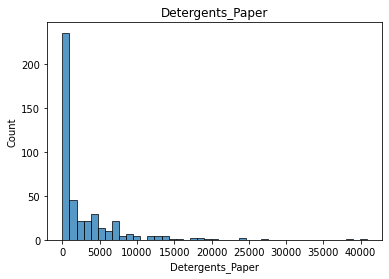

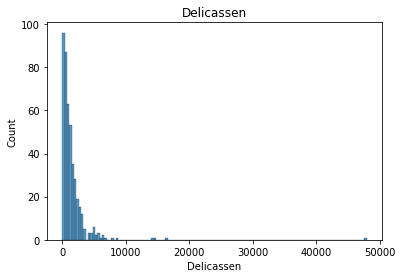

In [22]:
for i in df.iloc[:,2:].columns:
  sns.histplot(x=df[i])
  plt.title(i)
  plt.show()

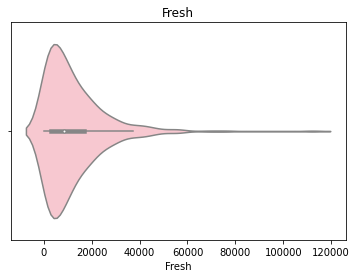

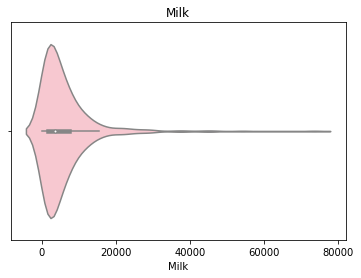

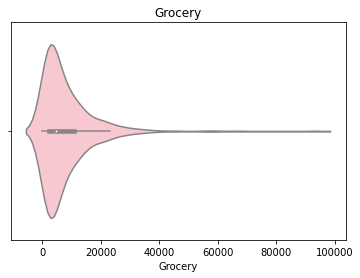

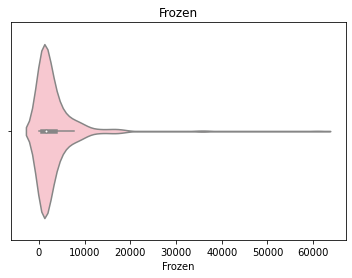

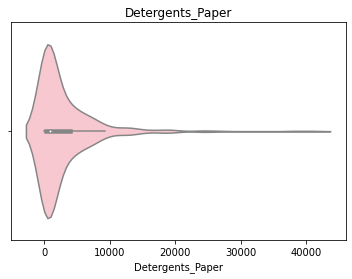

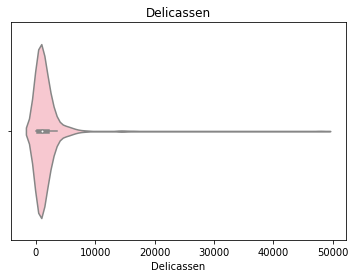

In [24]:
for i in df.iloc[:,2:].columns:
  sns.violinplot(x=df[i],color='pink')
  plt.title(i)
  plt.show()

In [25]:
# Bi-variate Analysis
1) # cat-cat :chi-square(crosstab)
2) # num-num : scatter plot,jointplot,pairplot,corr,cov
3) # cat-num : groupby and agg barplot,summary,pareto

In [26]:
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

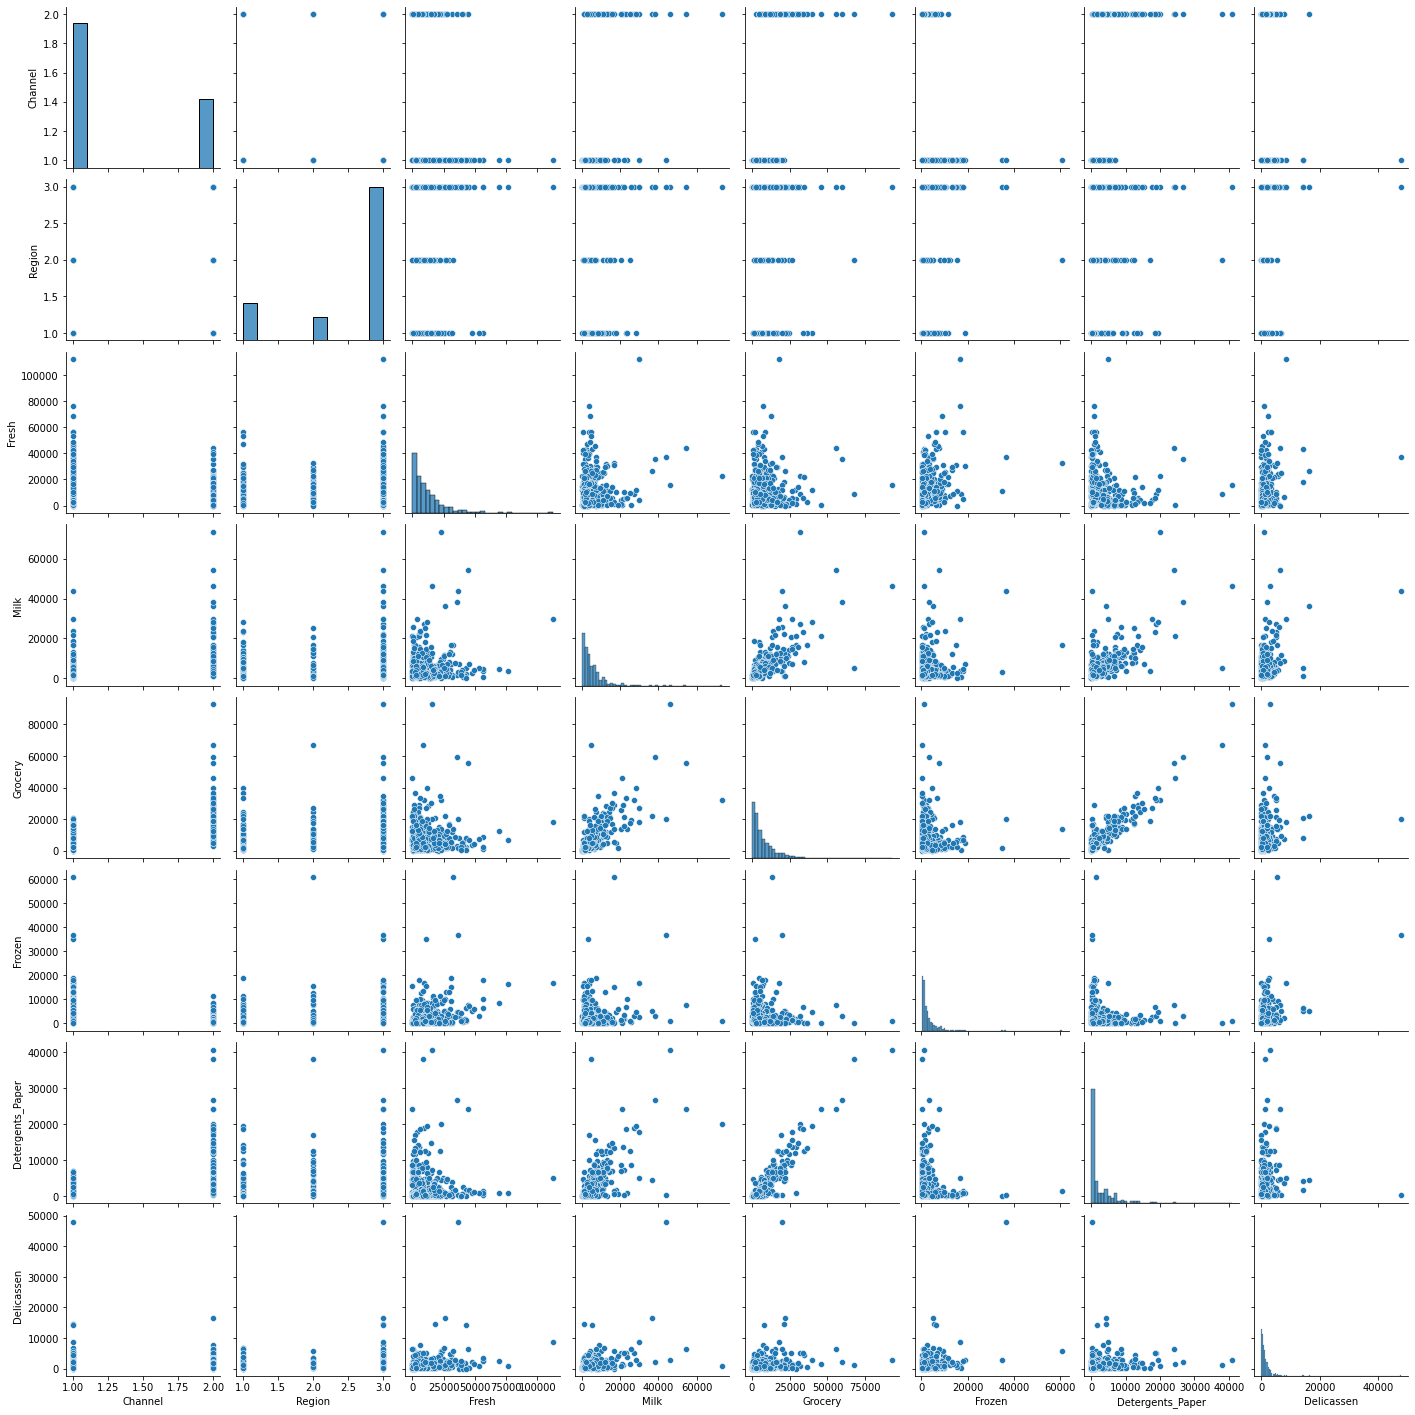

In [27]:
sns.pairplot(df)

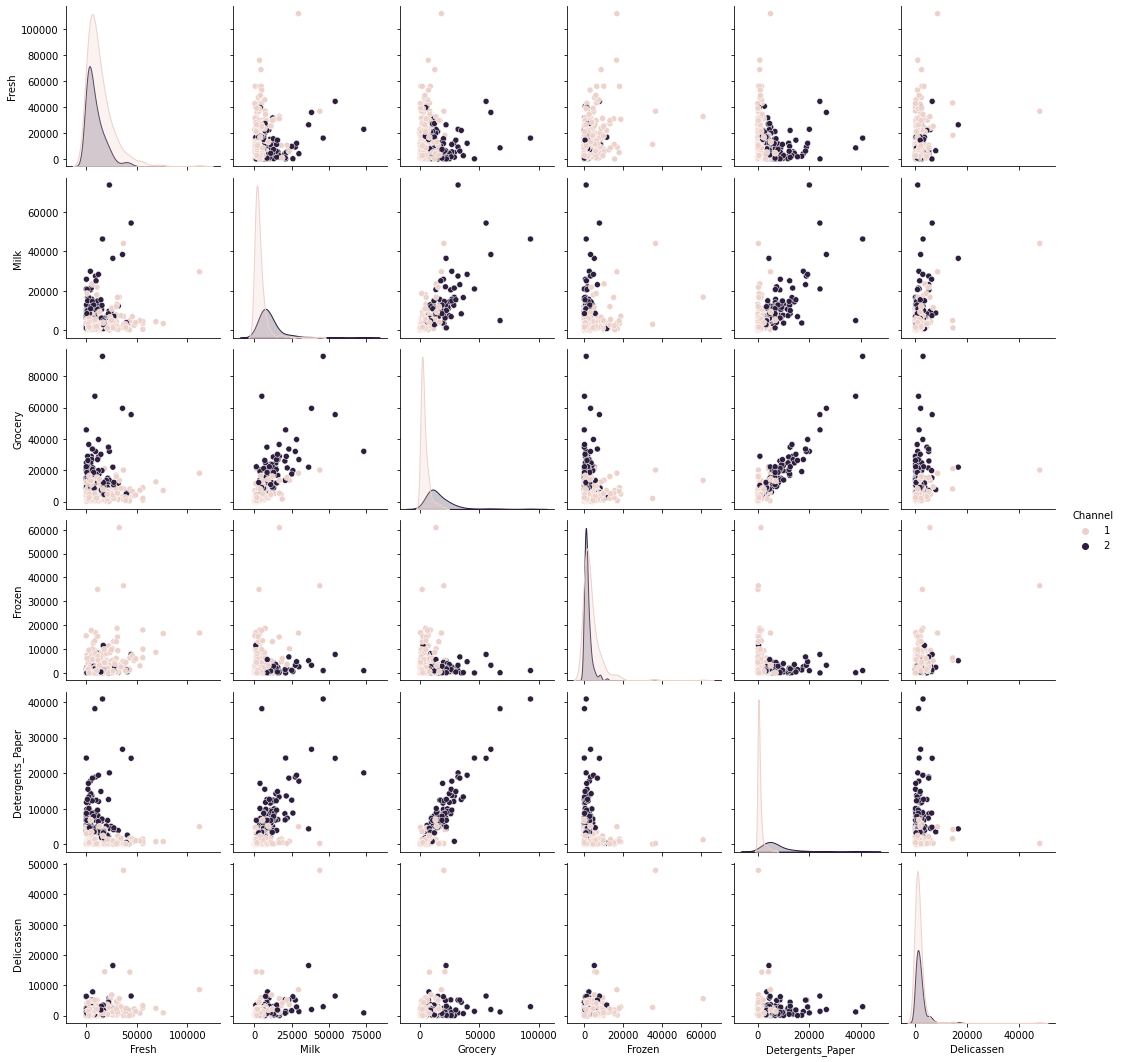

In [28]:
sns.pairplot(df,vars=[ 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],hue='Channel')
plt.show()

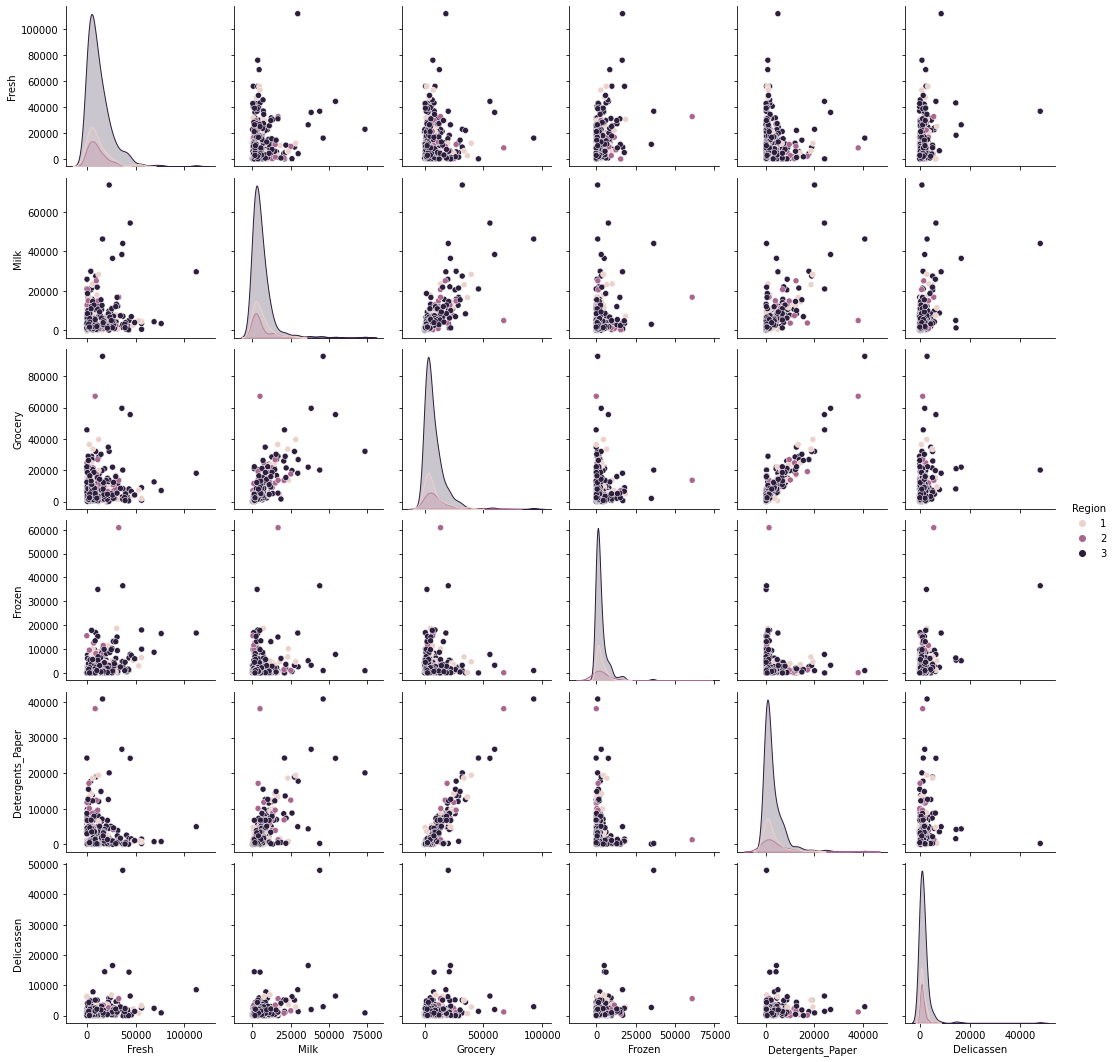

In [29]:
sns.pairplot(df,vars=[ 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],hue='Region')
plt.show()

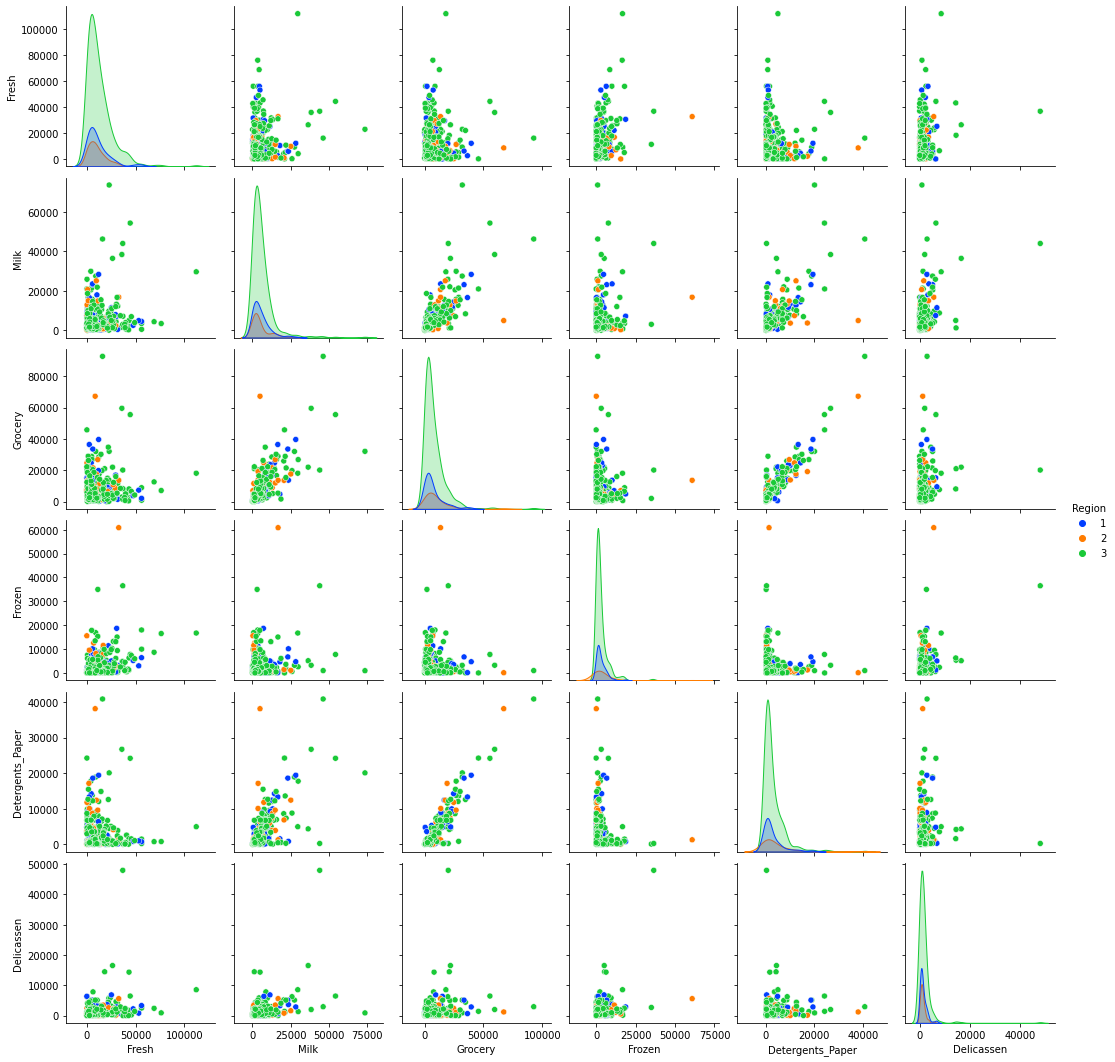

In [31]:
sns.pairplot(df,vars=[ 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],hue='Region',palette='bright')
plt.show()

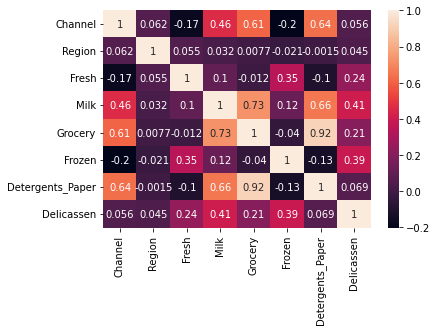

In [36]:
c=df.corr()  # To check the correlation
sns.heatmap(c,annot=True)
plt.show()


In [38]:
#inference= the columns are not highly correlated

In [39]:
#outlier treatment

In [40]:
df.iloc[:,2:].describe(percentiles=[0.01,0.02,.03,.04,.05,.50,.90,.91,.92,.95,.96,.97,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,50%,90%,91%,92%,95%,96%,97%,98%,99%,max
Fresh,440.0,12000.297727,12647.328865,3.0,28.46,134.94,203.23,274.56,401.90,8504.0,27090.5,28075.44,29725.88,36818.50,39426.44,42705.42,46047.66,56082.61,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,255.56,336.12,494.44,567.32,593.75,3627.0,12229.9,12785.35,13250.56,16843.40,20788.76,22947.87,27659.88,37610.06,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,259.82,524.10,586.36,691.96,851.45,4755.5,18910.1,19831.19,20386.16,24033.50,26546.12,28856.23,32437.84,43435.74,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,43.95,72.02,101.40,130.56,136.85,1526.0,7545.3,8007.56,8305.88,9930.75,10985.76,13208.04,15807.14,17964.82,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,9.39,23.90,43.17,52.68,63.70,816.5,7438.3,7849.85,8672.64,12043.20,12611.68,14148.47,17927.88,22571.61,40827.0
Delicassen,440.0,1524.870455,2820.105937,3.0,7.39,21.12,46.00,56.56,63.95,965.5,2945.9,3108.92,3181.88,4485.40,5120.44,5202.43,6276.84,8274.66,47943.0


In [45]:
print(df[df['Fresh']>27090.5].shape)
print(df[df['Fresh']>36818.50].shape)
print(df[df['Delicassen']>2945.9].shape)

(44, 8)
(22, 8)
(44, 8)


In [46]:
def outlier_clip(x):
  x=x.clip(upper=x.quantile(.90))
  return x

In [47]:
cols_with_outliers=['Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen']

In [48]:
df[cols_with_outliers]=df[cols_with_outliers].apply(outlier_clip)

In [49]:
x=df.drop("Channel",axis=1)
y=df["Channel"]

In [50]:
from sklearn.model_selection import  train_test_split

In [ ]:
x_train,x_test,